In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn.metrics as metrics
import statsmodels.api as sm

%matplotlib inline

In [2]:
def best_line(X, Y):
    """This function plots the best-fit line for a group of datapoints broken into
    a set of independent variable values (X) and a set of dependent variable values (Y)
    """
    import numpy as np
    from matplotlib import pyplot as plt

    X_bar = np.mean(X)
    Y_bar = np.mean(Y)

    X_diffs = np.asarray([i - X_bar for i in X])
    Y_diffs = np.asarray([i - Y_bar for i in Y])

    num = X_diffs.dot(Y_diffs)

    denom = np.sqrt((X_diffs**2).sum() * (Y_diffs**2).sum())

    r_pearson = num / denom

    beta_1 = r_pearson * Y_diffs.std() / X_diffs.std()

    beta_0 = Y_bar - beta_1 * X_bar

    Xs = np.linspace(np.min(X), np.max(X), 100)
    Ys = beta_1 * Xs + beta_0

    fig, ax = plt.subplots()
    ax.plot(X, Y, "ro", label="datapoints")
    ax.plot(Xs, Ys, "k", label=f"y={round(beta_1, 2)}x+{round(beta_0, 2)}")
    plt.legend()
    plt.show()

Yes, the equations you provided are indeed related to ordinary least squares (OLS) linear regression. Let me break it down:

1. **Slope (m):**
   - The formula you provided for the slope is:
     $[ m = r_P \times \frac{\sigma_y}{\sigma_x} = \frac{{\text{cov}(X, Y)}}{{\text{var}(X)}} ]$
   - Here, $( r_P )$ represents the Pearson correlation coefficient between the variables X and Y, while $( \sigma_y )$ and $( \sigma_x )$ represent the standard deviations of Y and X, respectively. 
   - This formula represents the slope of the best-fit line in terms of the relationship between the variables X and Y. In OLS regression, this slope is estimated based on the covariance and variance of the variables.

2. **Y-intercept (b):**
   - The formula you provided for the y-intercept is:
     $[ b = \mu_y - m\mu_x ]$
   - Here, $( \mu_y )$ and $( \mu_x )$ represent the means of Y and X, respectively. 
   - This formula represents the y-intercept of the best-fit line in terms of the means of the variables X and Y, along with the slope $( m )$ calculated previously.

These equations are indeed fundamental to linear regression and are used in OLS regression to estimate the parameters of the regression line that best fits the given data points.

Sure, let's walk through how Ordinary Least Squares (OLS) regression works mathematically using the provided data:

```python
ages = np.array([20, 25, 30, 35, 40])
cigarettes_per_day = np.array([10, 15, 20, 25, 30])
```

1. **Define the model**: In simple linear regression, the model is represented as:

   $[ Y = \beta_0 + \beta_1 X + \epsilon ]$

   Where:
   - $ ( Y )$ is the dependent variable (cigarettes per day),
   - $ ( X )$ is the independent variable (ages),
   - $ ( \beta_0 )$ is the y-intercept (constant term),
   - $ ( \beta_1 )$ is the slope (coefficient of the independent variable),
   - $ ( \epsilon )$ is the error term.

2. **Calculate the mean of X and Y**:
   $[ \bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i ]$
    
   $[ \bar{Y} = \frac{1}{n} \sum_{i=1}^{n} Y_i ]$

   For our data:
   
   $[ \bar{X} = \frac{20 + 25 + 30 + 35 + 40}{5} = 30 ]$
   
   $[ \bar{Y} = \frac{10 + 15 + 20 + 25 + 30}{5} = 20 ]$

3. **Calculate the slope (β1)**:

   $[ \beta_1 = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sum_{i=1}^{n} (X_i - \bar{X})^2} ]$

   Substituting the values:

   $[ \beta_1 = \frac{(20-30)(10-20) + (25-30)(15-20) + (30-30)(20-20) + (35-30)(25-20) + (40-30)(30-20)}{(20-30)^2 + (25-30)^2 + (30-30)^2 + (35-30)^2 + (40-30)^2} ]$

   Simplifying, we get:

   $[ \beta_1 = \frac{-100 + (-5)(-5) + 0 + 5(5) + 100}{100 + 25 + 0 + 25 + 100} = \frac{50}{125} = 0.4 ]$

4. **Calculate the y-intercept (β0)**:

   $[ \beta_0 = \bar{Y} - \beta_1 \bar{X} ]$

   Substituting the values:
   
   $[ \beta_0 = 20 - 0.4 \times 30 = 20 - 12 = 8 ]$

5. **Fit the regression line**:
   Now we have the estimated values of $( \beta_0 )$ and \( \beta_1 \), so the regression line equation is:
   $[ \text{Cigarettes per day} = 0.4 \times \text{Age} + 8 ]$

   This line represents the best linear fit to the given data points.

                            OLS Regression Results                            
Dep. Variable:       CigarettesPerDay   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     3.271
Date:                Thu, 22 Feb 2024   Prob (F-statistic):             0.0736
Time:                        11:30:27   Log-Likelihood:                -246.93
No. Observations:                 100   AIC:                             497.9
Df Residuals:                      98   BIC:                             503.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9776      1.193      6.690      0.0

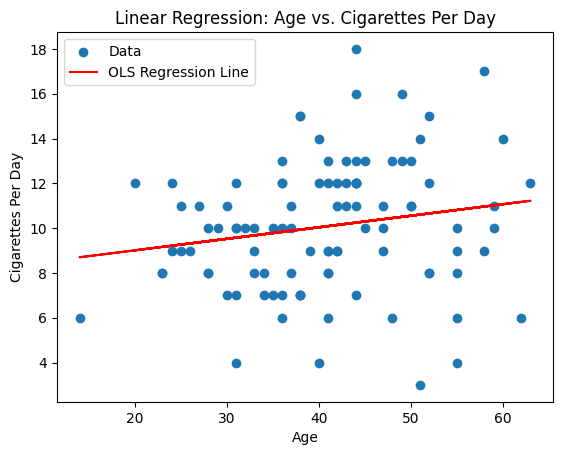

In [3]:
np.random.seed(0)
num_samples = 100
age = np.random.normal(loc=40, scale=10, size=num_samples).round(0)
cigarettes_per_day = np.random.poisson(lam=10, size=num_samples)
smoking_data = pd.DataFrame({"Age": age, "CigarettesPerDay": cigarettes_per_day})

# Perform linear regression
X = smoking_data["Age"]
y = smoking_data["CigarettesPerDay"]
X = sm.add_constant(X)  # Add a constant term to the predictor
model = sm.OLS(y, X).fit()  # Fit the ordinary least squares (OLS) model
y_pred = model.predict(X)

print(model.summary())  # Print the summary of the model

# Plot the data and the regression line
plt.scatter(age, cigarettes_per_day, label="Data")
plt.plot(age, y_pred, color="red", label="OLS Regression Line")
plt.xlabel("Age")
plt.ylabel("Cigarettes Per Day")
plt.title("Linear Regression: Age vs. Cigarettes Per Day")
plt.legend()
plt.show()

In the summary table printed by `model.summary()`, there are several statistics that can be used to assess the performance and goodness of fit of the linear regression model. Here are some of the key metrics commonly used for this purpose:

1. **R-squared (R²):** This statistic measures the proportion of the variance in the dependent variable (cigarettes per day) that is explained by the independent variable (age). A higher R-squared value indicates a better fit of the model to the data.

2. **Adjusted R-squared:** This is a modified version of R-squared that takes into account the number of predictors in the model. It penalizes the addition of unnecessary predictors and is especially useful when comparing models with different numbers of predictors.

3. **F-statistic and Prob (F-statistic):** The F-statistic tests the overall significance of the regression model. A low p-value (Prob (F-statistic)) indicates that at least one of the independent variables is significantly related to the dependent variable.

4. **Root Mean Squared Error (RMSE):** This is the square root of the mean of the squared differences between the observed and predicted values. It provides a measure of the average deviation of the predicted values from the actual values. A lower RMSE indicates better model performance.

5. **AIC and BIC:** Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are measures of the relative quality of statistical models. Lower values of AIC and BIC indicate better model fit, with penalization for model complexity.

You can use these metrics to evaluate the performance of the linear regression model and determine how well it captures the relationship between age and cigarettes per day in the dataset.